In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
data_path = '/content/drive/MyDrive/Politechnika/Magisterka/modele/YOLOv5/wyniki/csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(os.path.join(data_path,'results_0.csv'), skipinitialspace = True)
df1 = pd.read_csv(os.path.join(data_path,'results_1.csv'), skipinitialspace = True)
df2 = pd.read_csv(os.path.join(data_path,'results_2.csv'), skipinitialspace = True)
df3 = pd.read_csv(os.path.join(data_path,'results_3.csv'), skipinitialspace = True)
df4 = pd.read_csv(os.path.join(data_path,'results_3.csv'), skipinitialspace = True)
df5 = pd.read_csv(os.path.join(data_path,'results_5.csv'), skipinitialspace = True)
df6 = pd.read_csv(os.path.join(data_path,'results_6.csv'), skipinitialspace = True)
df7 = pd.read_csv(os.path.join(data_path,'results_7.csv'), skipinitialspace = True)
df8 = pd.read_csv(os.path.join(data_path,'results_8.csv'), skipinitialspace = True)
dfevol = pd.read_csv(os.path.join(data_path,'300iter.csv'), skipinitialspace = True)
dfyoloL = pd.read_csv(os.path.join(data_path,'YOLOv5L_baseline.csv'), skipinitialspace = True)
dfyolos = pd.read_csv(os.path.join(data_path,'baseline_300iter.csv'), skipinitialspace = True)

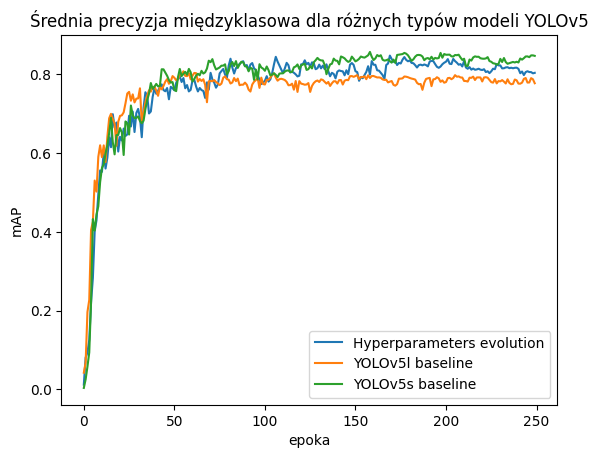

In [14]:
x_label = 'epoka'

fig, ax = plt.subplots()
# ax.plot(df['epoch'], df['metrics/mAP_0.5'], label='baseline')
# ax.plot(df1['epoch'], df1['metrics/mAP_0.5'], label='SGD, lr=0.01, momentum=0.937')
# ax.plot(df2['epoch'], df2['metrics/mAP_0.5'], label='SGD, lr=0.001, momentum=0.937')
# ax.plot(df3['epoch'], df3['metrics/mAP_0.5'], label='SGD, lr=0.001, momentum=0.9')
# ax.plot(df4['epoch'], df4['metrics/mAP_0.5'], label='SGD, lr=0.001, momentum=0.99')
# ax.plot(df5['epoch'], df5['metrics/mAP_0.5'], label='ADAM, lr=0.001, momentum=0.999')
# ax.plot(df6['epoch'], df6['metrics/mAP_0.5'], label='ADAM, lr=0.0001, momentum=0.9')
# ax.plot(df7['epoch'], df7['metrics/mAP_0.5'], label='ADAM, lr=0.0001, momentum=0.99')
# ax.plot(df8['epoch'], df8['metrics/mAP_0.5'], label='ADAM, lr=0.0001, momentum=0.999')
ax.plot(dfevol['epoch'][:250], dfevol['metrics/mAP_0.5'][:250], label='Hyperparameters evolution')
ax.plot(dfyoloL['epoch'][:250], dfyoloL['metrics/mAP_0.5'][:250], label='YOLOv5l baseline')
ax.plot(dfyolos['epoch'][:250], dfyolos['metrics/mAP_0.5'][:250], label='YOLOv5s baseline')
ax.plot
ax.set_xlabel("epoka")
ax.set_ylabel("mAP")
ax.legend()
ax.set_title('Średnia precyzja międzyklasowa dla różnych typów modeli YOLOv5')
plt.show()

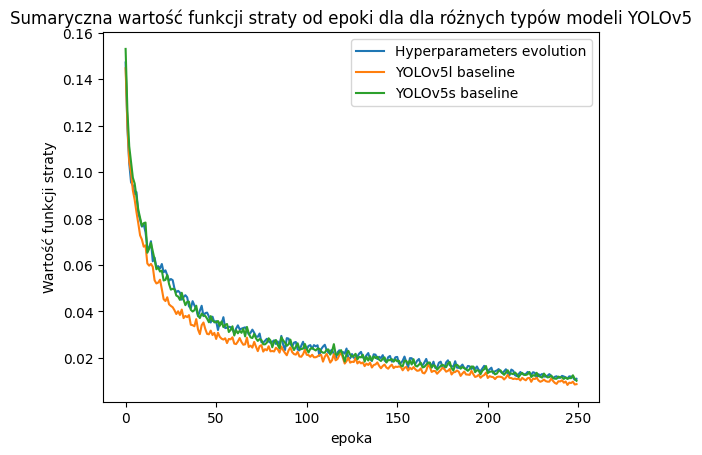

In [16]:
fig, ax = plt.subplots()
# ax.plot(df['epoch'], df['train/box_loss'] + df['train/obj_loss'] + df['train/cls_loss'], label='baseline')
# ax.plot(df1['epoch'], df1['train/box_loss'] + df1['train/obj_loss'] + df1['train/cls_loss'], label='SGD, lr=0.01, momentum=0.937')
# ax.plot(df2['epoch'], df2['train/box_loss'] + df2['train/obj_loss'] + df2['train/cls_loss'], label='SGD, lr=0.001, momentum=0.937')
# ax.plot(df3['epoch'], df3['train/box_loss'] + df3['train/obj_loss'] + df3['train/cls_loss'], label='SGD, lr=0.001, momentum=0.9')
# ax.plot(df4['epoch'], df4['train/box_loss'] + df4['train/obj_loss'] + df4['train/cls_loss'], label='SGD, lr=0.001, momentum=0.99')
# ax.plot(df5['epoch'], df5['train/box_loss'] + df5['train/obj_loss'] + df5['train/cls_loss'], label='ADAM, lr=0.001, momentum=0.999')
# ax.plot(df6['epoch'], df6['train/box_loss'] + df6['train/obj_loss'] + df6['train/cls_loss'], label='ADAM, lr=0.0001, momentum=0.9')
# ax.plot(df7['epoch'], df7['train/box_loss'] + df7['train/obj_loss'] + df7['train/cls_loss'], label='ADAM, lr=0.0001, momentum=0.99')
# ax.plot(df8['epoch'], df8['train/box_loss'] + df8['train/obj_loss'] + df8['train/cls_loss'], label='ADAM, lr=0.0001, momentum=0.999')
ax.plot(dfevol['epoch'][:250], dfevol['train/box_loss'][:250]+ dfevol['train/obj_loss'][:250] + dfevol['train/cls_loss'][:250], label='Hyperparameters evolution')
ax.plot(dfyoloL['epoch'][:250], dfyoloL['train/box_loss'][:250] + dfyoloL['train/obj_loss'][:250] + dfyoloL['train/cls_loss'][:250], label='YOLOv5l baseline')
ax.plot(dfyolos['epoch'][:250], dfyolos['train/box_loss'][:250] + dfyolos['train/obj_loss'][:250] + dfyolos['train/cls_loss'][:250], label='YOLOv5s baseline')
ax.set_xlabel("epoka")
ax.set_ylabel("Wartość funkcji straty")
ax.legend()
ax.set_title('Sumaryczna wartość funkcji straty od epoki dla dla różnych typów modeli YOLOv5')
plt.show()

In [ ]:
import numpy as np
import matplotlib

In [ ]:
def fitness(x):
    # Model fitness as a weighted combination of metrics
    w = [0.0, 0.0, 0.1, 0.9]  # weights for [P, R, mAP@0.5, mAP@0.5:0.95]
    return (x[:, :4] * w).sum(1)

In [ ]:
def hist2d(x, y, n=100):
    # 2d histogram used in labels.png and evolve.png
    xedges, yedges = np.linspace(x.min(), x.max(), n), np.linspace(y.min(), y.max(), n)
    hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))
    xidx = np.clip(np.digitize(x, xedges) - 1, 0, hist.shape[0] - 1)
    yidx = np.clip(np.digitize(y, yedges) - 1, 0, hist.shape[1] - 1)
    return np.log(hist[xidx, yidx])

In [ ]:
def plot_evolve():  # from utils.plots import *; plot_evolve()
    # Plot evolve.csv hyp evolution results
    data = pd.read_csv(os.path.join(data_path,'evolve_300iter.csv'))
    keys = [x.strip() for x in data.columns]
    x = data.values
    f = fitness(x)
    j = np.argmax(f)  # max fitness index
    plt.figure(figsize=(10, 12), tight_layout=True)
    matplotlib.rc('font', **{'size': 8})
    print(f'Best results from row {j} of hyperparameters:')
    for i, k in enumerate(keys[7:]):
        v = x[:, 7 + i]
        mu = v[j]  # best single result
        plt.subplot(6, 5, i + 1)
        plt.scatter(v, f, c=hist2d(v, f, 20), cmap='viridis', alpha=.8, edgecolors='none')
        plt.plot(mu, f.max(), 'k+', markersize=15)
        plt.title(f'{k} = {mu:.3g}', fontdict={'size': 9})  # limit to 40 characters
        if i % 5 != 0:
            plt.yticks([])
        print(f'{k:>15}: {mu:.3g}')
    plt.show()
    # f = evolve_csv.with_suffix('.png')  # filename
    # plt.savefig(f, dpi=200)
    # plt.close()
    # print(f'Saved {f}')

Best results from row 193 of hyperparameters:
            lr0: 0.0123
            lrf: 0.0724
       momentum: 0.934
   weight_decay: 0.00035
  warmup_epochs: 4.06
warmup_momentum: 0.943
 warmup_bias_lr: 0.128
            box: 0.04
            cls: 0.25
         cls_pw: 0.86
            obj: 0.812
         obj_pw: 0.939
          iou_t: 0.2
       anchor_t: 4.55
       fl_gamma: 0
          hsv_h: 0
          hsv_s: 0
          hsv_v: 0
        degrees: 0
      translate: 0
          scale: 0
          shear: 0
    perspective: 0
         flipud: 0
         fliplr: 0
         mosaic: 0
          mixup: 0
     copy_paste: 0
        anchors: 2.63


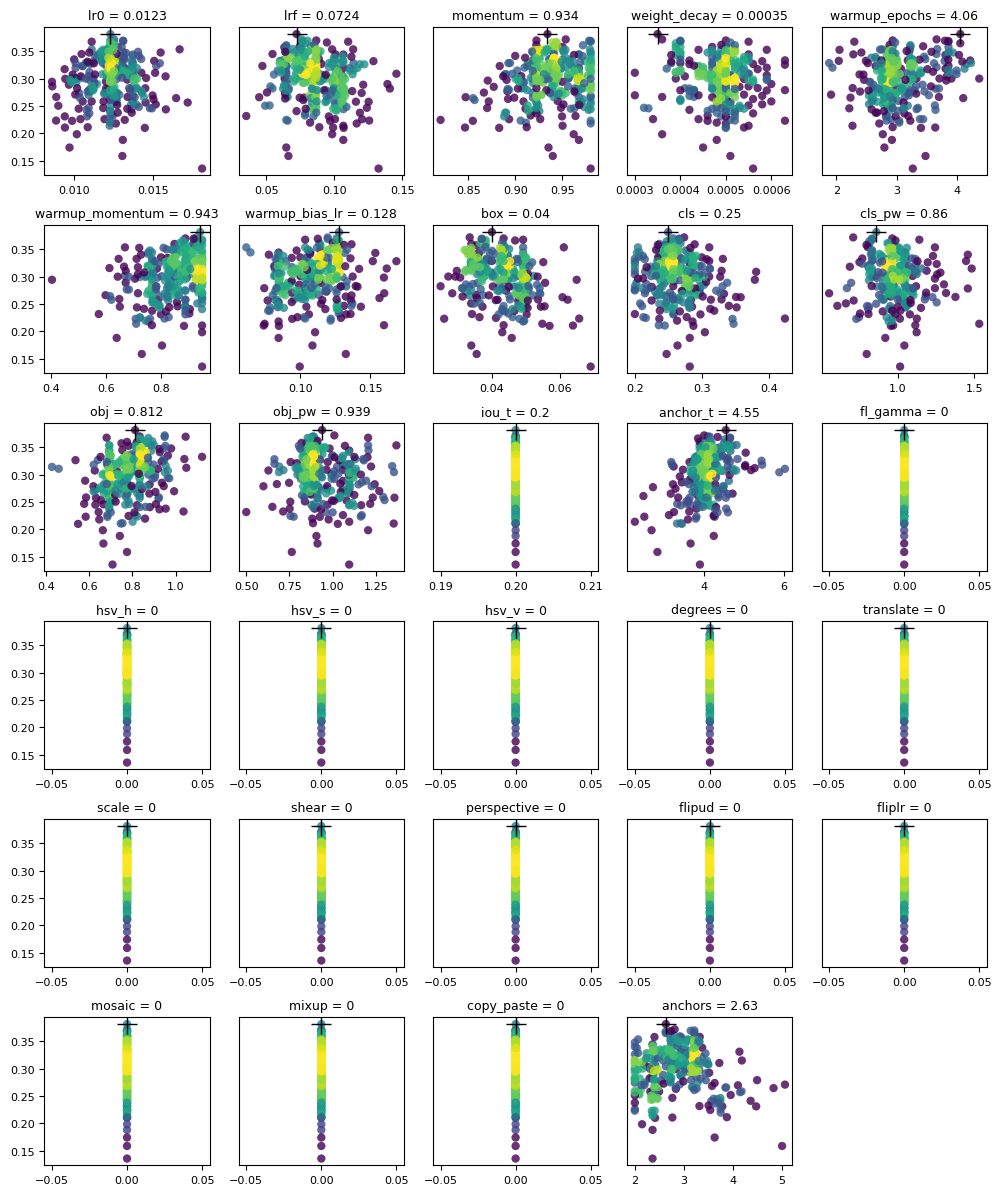

In [ ]:
plot_evolve()